In [1]:
import pandas as pd

italy_df = pd.read_csv('data\Regional Data - Sheet1.csv',index_col=0,header=1,parse_dates=[0])

cases_df = italy_df.iloc[:,:3]

In [2]:
cases_df['Date'] = cases_df.index
pivoted = cases_df.pivot(values='New positives',index='Date',columns='Region')
pivoted.columns = pivoted.columns.astype(str)
pivoted = pivoted.rename(columns={'nan':'Unknown Region'})
pivoted

Region,Unknown Region,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,...,Molise,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Trentino-Alto Adige,Umbria,Valle d'Aosta,Veneto
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,221,0,0,0,0,18,0,2,0,166,...,0,3,0,0,0,0,0,0,0,32
2020-02-25,93,0,0,0,0,8,0,0,1,68,...,0,0,0,0,3,2,1,0,0,10
2020-02-26,78,0,0,0,0,21,0,0,10,18,...,0,0,0,0,0,0,0,0,0,28
2020-02-27,250,1,0,0,3,50,0,0,8,145,...,0,1,1,0,1,0,0,0,0,40
2020-02-28,238,0,0,1,1,48,0,0,0,128,...,0,9,2,0,0,6,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-23,669,1,4,0,11,43,6,18,38,441,...,5,60,8,0,0,12,7,1,0,10
2020-05-24,531,5,1,0,5,45,3,20,53,285,...,1,43,10,0,2,15,12,0,1,17
2020-05-25,300,1,0,0,6,29,4,16,17,148,...,0,48,9,2,4,5,1,0,1,11


In [3]:
import pandas_alive

# bar_chart_race = pivoted.cumsum().plot_animated(filename='test.mp4',enable_progress_bar=True)

In [4]:
import geopandas

region_gdf = geopandas.read_file('C:\\Users\\jackm\\Documents\\GitHub\\pandas-alive\\data\\geo-data\\italy-with-regions\\reg2011_g.shp')

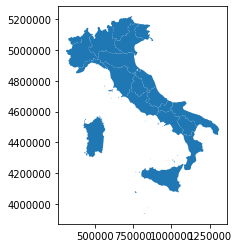

In [5]:
region_gdf.plot()

In [6]:
region_gdf.NOME_REG = region_gdf.NOME_REG.str.lower().str.title()
region_gdf = region_gdf.replace('Trentino-Alto Adige/Sudtirol','Trentino-Alto Adige')
region_gdf = region_gdf.replace("Valle D'Aosta/Vallée D'Aoste\r\nValle D'Aosta/Vallée D'Aoste","Valle d'Aosta")


In [7]:
region_gdf.crs

{'init': 'epsg:23032'}

In [9]:
import pandas_alive
import contextily
cases_gdf = pivoted.T
cases_gdf['geometry'] = cases_gdf.index.map(region_gdf.set_index('NOME_REG')['geometry'].to_dict())
# cases_gdf[cases_gdf['geometry'].isna()]
cases_gdf = cases_gdf[cases_gdf['geometry'].notna()]
# print(type(cases_gdf))
cases_gdf = geopandas.GeoDataFrame(cases_gdf, crs=region_gdf.crs, geometry=cases_gdf.geometry)
cases_gdf
# cases_gdf.plot_animated(filename='test.mp4',enable_progress_bar=True,basemap_format={'source':contextily.providers.CartoDB.Voyager},cmap='viridis')

Date,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,...,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,2020-05-23 00:00:00,2020-05-24 00:00:00,2020-05-25 00:00:00,2020-05-26 00:00:00,2020-05-27 00:00:00,geometry
Region,,,,,,,,,,,,,,,,,,,,,
Abruzzo,0,0,0,1,0,1,3,0,1,1,...,4,8,7,8,1,5,1,3,5,"POLYGON ((901880.250 4760558.000, 901910.750 4..."
Basilicata,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,4,1,0,0,0,"MULTIPOLYGON (((1074503.688 4446135.938, 10744..."
Calabria,0,0,0,0,1,0,0,0,0,0,...,2,3,0,1,0,0,0,0,1,"MULTIPOLYGON (((1084888.411 4414364.607, 10848..."
Campania,0,0,0,3,1,9,4,0,13,1,...,12,7,9,10,11,5,6,12,6,"MULTIPOLYGON (((925294.173 4528798.912, 925329..."
Emilia-Romagna,18,8,21,50,48,72,68,50,85,124,...,47,50,53,53,43,45,29,24,16,"MULTIPOLYGON (((760714.748 4937319.399, 760723..."
Friuli Venezia Giulia,0,0,0,0,0,0,6,3,4,5,...,5,6,6,12,6,3,4,11,4,"MULTIPOLYGON (((852211.994 5080672.916, 852270..."
Lazio,2,0,0,0,0,3,0,1,7,16,...,20,28,25,31,18,20,16,18,11,"MULTIPOLYGON (((802704.568 4594643.932, 802540..."
Liguria,0,1,10,8,0,23,17,3,2,2,...,66,32,55,45,38,53,17,53,39,"MULTIPOLYGON (((400403.625 4851436.938, 400257..."
Lombardia,166,68,18,145,128,84,369,270,266,300,...,462,294,316,293,441,285,148,159,384,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
